In [14]:
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load the dataset
file_path = 'INF2178_A2_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


**RQ1: Is there a significant difference in space allocation (total capacity) between different types of child care centers (auspice) in Toronto?**

By exploring if different types of child care centers have significant variations in total capacity, we can understand how the management model (nonprofit, commercial, public) might influence space allocation. This insight can help evaluate whether certain types of centers are better equipped to meet demand, contributing to a narrative on the effectiveness of various child care management systems in Ontario.

In [5]:
# Extract the relevant columns for the first question (Auspice and Space Allocation)
auspice_and_space = data[['AUSPICE', 'TOTSPACE']]

# Check the distribution of data for these columns
auspice_and_space_info = {
    'Auspice Types': auspice_and_space['AUSPICE'].unique(),
    'Total Spaces Summary': auspice_and_space['TOTSPACE'].describe()
}

auspice_and_space_info


{'Auspice Types': array(['Non Profit Agency', 'Commercial Agency',
        'Public (City Operated) Agency'], dtype=object),
 'Total Spaces Summary': count    1063.000000
 mean       75.674506
 std        47.816518
 min         6.000000
 25%        43.000000
 50%        62.000000
 75%        97.000000
 max       402.000000
 Name: TOTSPACE, dtype: float64}

In [7]:
# Perform one-way ANOVA 
model_1 = ols('TOTSPACE ~ C(AUSPICE)', data=auspice_and_space).fit()
anova_results_1 = sm.stats.anova_lm(model_1, typ=2)

anova_results_1

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


The one-way ANOVA results for Auspice and Space Allocation show that there is a statistically significant difference in total space allocation between the different types of child care centers (p-value < 0.001). This suggests that the type of auspice has an effect on how many spaces a child care center can offer.

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_143860\1737811325.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='AUSPICE', y='TOTSPACE', data=auspice_and_space, ci='sd')


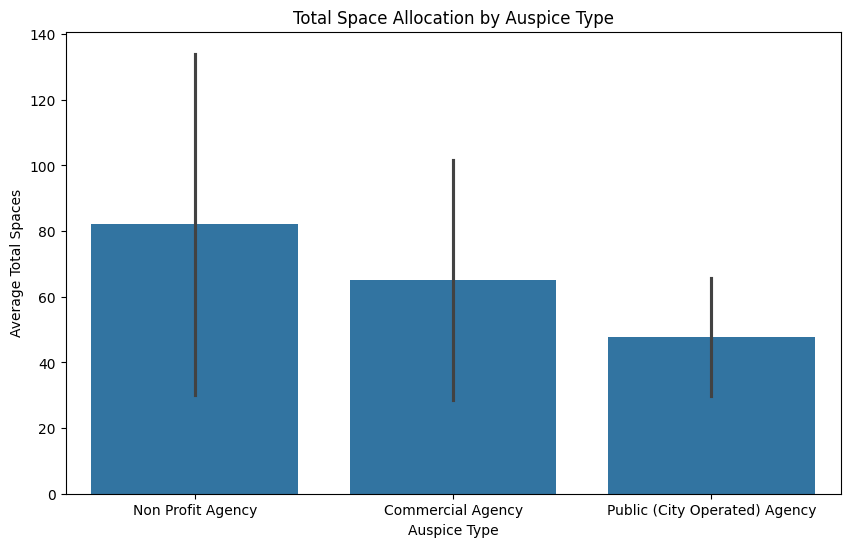

In [18]:
# Distribution plot for Question 1: Auspice and Space Allocation
plt.figure(figsize=(10, 6))
sns.barplot(x='AUSPICE', y='TOTSPACE', data=auspice_and_space, ci='sd')
plt.title('Total Space Allocation by Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Average Total Spaces')
plt.show()

The bar chart shows the average total spaces provided by each type of child care center: Non-Profit Agency, Commercial Agency, and Public (City Operated) Agency. The error bars indicate the variability in the data, which represents the standard deviation. It illustrates the average number of total spaces provided by each auspice type, suggesting that Non-Profit Agencies tend to offer more spaces on average compared to Commercial Agencies and Public (City Operated) Agencies. However, the error bars, which reflect the spread of the data (likely the standard deviation), indicate there's considerable variability within each type of agency. 

In [17]:
# Post-hoc Tukey's test for Question 1
post_hoc_1 = pairwise_tukeyhsd(endog=auspice_and_space['TOTSPACE'], groups=auspice_and_space['AUSPICE'], alpha=0.05)
print(post_hoc_1)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


The Tukey post hoc test provides this statistical confirmation. It compares the means of total spaces for each pair of auspice types and adjusts the p-values for multiple comparisons, which is necessary when conducting multiple t-tests. It is found that:
- Commercial agencies have significantly fewer spaces on average than Non-Profit agencies.
- Public (City Operated) agencies have significantly fewer spaces on average than Non-Profit agencies.
- There is no significant difference between the space offerings of Commercial and Public (City Operated) agencies.

**RQ2: Does the availability of subsidy impact the total space allocation in child care centers?**

Investigating the relationship between subsidy availability and total capacity could reveal if financial support from the government is aligned with larger centers that can accommodate more children. This could inform a narrative on how subsidies are potentially used to increase child care availability in areas with higher demand or lower-income families.

In [8]:
# Extract the relevant columns for the second question (Subsidy Availability and Capacity)
subsidy_and_space = data[['subsidy', 'TOTSPACE']]

# Check the distribution of data for these columns and count how many centers offer subsidies
subsidy_and_space_info = {
    'Subsidy Availability': subsidy_and_space['subsidy'].value_counts(),
    'Total Spaces Summary': subsidy_and_space['TOTSPACE'].describe()
}

subsidy_and_space_info


{'Subsidy Availability': subsidy
 Y    718
 N    345
 Name: count, dtype: int64,
 'Total Spaces Summary': count    1063.000000
 mean       75.674506
 std        47.816518
 min         6.000000
 25%        43.000000
 50%        62.000000
 75%        97.000000
 max       402.000000
 Name: TOTSPACE, dtype: float64}

In [11]:
# For subsidy, we need to convert the 'Y' and 'N' to a numeric format to conduct ANOVA
subsidy_and_space['subsidy_numeric'] = subsidy_and_space['subsidy'].apply(lambda x: 1 if x == 'Y' else 0)

# Perform one-way ANOVA for the second question (Subsidy Availability and Capacity)
model_2 = ols('TOTSPACE ~ C(subsidy_numeric)', data=subsidy_and_space).fit()
anova_results_2 = sm.stats.anova_lm(model_2, typ=2)

anova_results_2


C:\Users\ftuzz\AppData\Local\Temp\ipykernel_143860\4044185645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsidy_and_space['subsidy_numeric'] = subsidy_and_space['subsidy'].apply(lambda x: 1 if x == 'Y' else 0)


,sum_sq,df,F,PR(>F)
C(subsidy_numeric),1.607654e+05,1.0,75.227653,1.550892e-17
Residual,2.267412e+06,1061.0,NaN,NaN


The one-way ANOVA results for Subsidy Availability and Capacity indicate that there is also a statistically significant difference in total space allocation based on the availability of subsidies (p-value < 0.001). This means that whether a child care center offers subsidies or not is associated with a difference in their capacity.

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_143860\933805013.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='subsidy', y='TOTSPACE', data=subsidy_and_space, ci='sd')


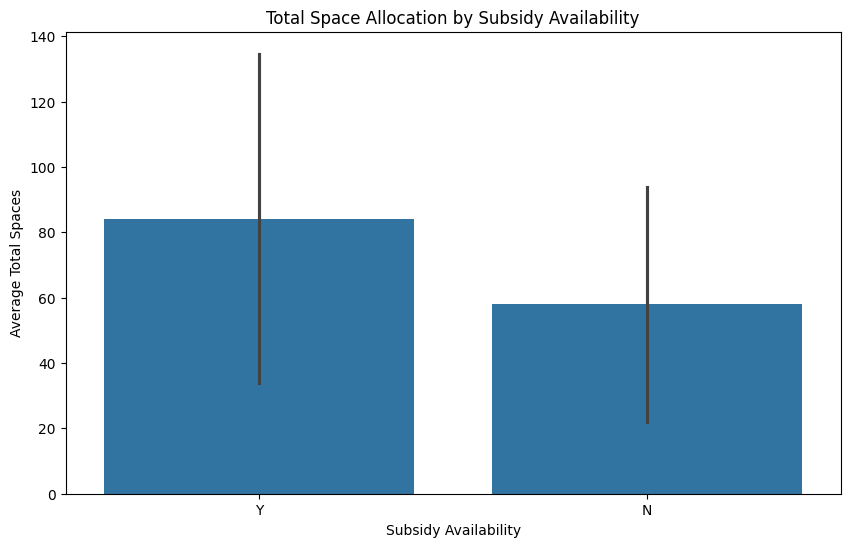

In [19]:
# Distribution plot for Question 2: Subsidy Availability and Capacity
plt.figure(figsize=(10, 6))
sns.barplot(x='subsidy', y='TOTSPACE', data=subsidy_and_space, ci='sd')
plt.title('Total Space Allocation by Subsidy Availability')
plt.xlabel('Subsidy Availability')
plt.ylabel('Average Total Spaces')
plt.show()

The barplot shows the average total spaces in child care centers that have subsidy availability ('Y') compared to those that do not ('N'). The bar for 'Y' shows a higher mean total space, and the error bars show variation within each group. This suggests that, on average, child care centers with subsidies may offer more spaces than those without.


In [25]:
# Question 2: Post-hoc test for Subsidy Availability and Capacity
subsidy_and_space.loc[:, 'subsidy_numeric'] = subsidy_and_space['subsidy'].apply(lambda x: 1 if x == 'Y' else 0)
tukey_2 = pairwise_tukeyhsd(endog=subsidy_and_space['TOTSPACE'],
                            groups=subsidy_and_space['subsidy_numeric'],
                            alpha=0.05)

tukey_2_results = tukey_2.summary()
tukey_2_results

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,26.2658,0.0,20.3236,32.208,True


The Tukey post hoc test results show a statistically significant mean difference in total spaces between centers with subsidies (group '1') and without subsidies (group '0'). The meandiff of approximately 26.27 indicates that centers with subsidies have an average of around 26 more spaces than centers without. The p-adj value of 0.0 (which is less than the standard alpha level of 0.05) indicates that this is a statistically significant difference. The reject column is 'True,' confirming that the null hypothesis (no difference in means) can be rejected.

**RQ3: Is there a significant difference in child care spaces among different wards in Toronto?**

By assessing the difference in child care spaces among different wards, we can gauge the geographic distribution of child care availability across Toronto. The insights from this analysis could highlight disparities and inform a narrative about potential inequities in child care access throughout the city.

In [9]:
# Extract the relevant columns for the third question (Ward-based Space Distribution)
ward_and_space = data[['ward', 'TOTSPACE']]

# Group the data by ward and sum up the total spaces for each ward
ward_space_distribution = ward_and_space.groupby('ward').agg({'TOTSPACE': 'sum'}).reset_index()

# Check the first few rows to see the distribution
ward_space_distribution.head()


,ward,TOTSPACE
0,1,2089
1,2,3276
2,3,4908
3,4,4572
4,5,2392


In [12]:
# Perform one-way ANOVA for the third question (Ward-based Space Distribution)
model_3 = ols('TOTSPACE ~ C(ward)', data=ward_and_space).fit()
anova_results_3 = sm.stats.anova_lm(model_3, typ=2)

anova_results_3

,sum_sq,df,F,PR(>F)
C(ward),7.859806e+04,24.0,1.446798,0.07592
Residual,2.349579e+06,1038.0,NaN,NaN


The one-way ANOVA for the Ward-based Space Distribution shows that the p-value is approximately 0.076, which is just above the traditional threshold of 0.05 for statistical significance. This suggests that while there may be differences in the number of child care spaces among the different wards of Toronto, the differences are not statistically significant at the 0.05 level. However, the p-value is close enough to the threshold that it could warrant a closer look, perhaps at a more granular geographic level or considering other factors such as population density.

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_143860\2626313763.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='ward', y='TOTSPACE', data=ward_and_space, ci='sd')


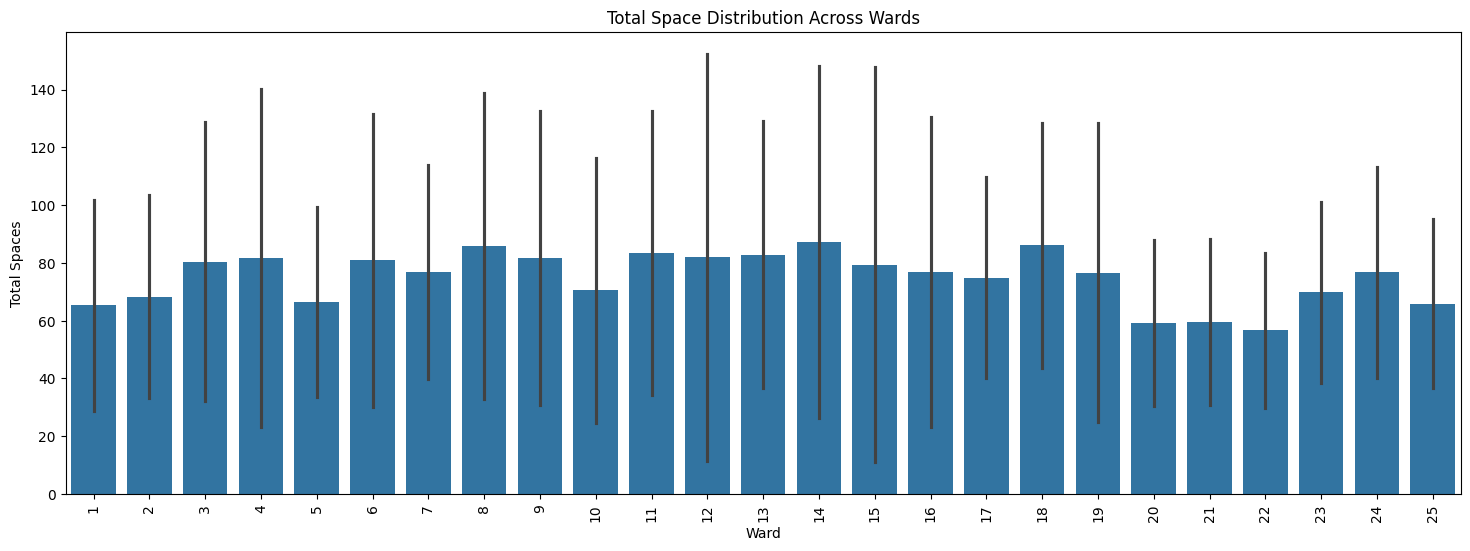

In [20]:
# Distribution of total spaces across different wards
plt.figure(figsize=(18, 6))
sns.barplot(x='ward', y='TOTSPACE', data=ward_and_space, ci='sd')
plt.title('Total Space Distribution Across Wards')
plt.xlabel('Ward')
plt.ylabel('Total Spaces')
plt.xticks(rotation=90)
plt.show()

The bar chart visualization for RQ3 presents the average total child care spaces available across the different wards of Toronto, with error bars indicating variability within each ward. Although there appears to be some variability in the number of spaces across wards, the absence of statistical significance from the ANOVA means these differences might not be reliable indicators of unequal distribution of child care spaces across the city. The considerable overlap in the error bars suggests that any ward-based disparities in child care space distribution are not clear-cut and could be influenced by a complex interplay of factors. This points to a need for a more detailed analysis that takes into account additional variables (population density, demand for child care services, socio-economic factors) to understand the true nature of child care space availability across Toronto's wards.

**RQ4: Do certain types of child care centers (auspice) have a preference for specific age groups of children (infant, toddler, preschool, kindergarten, school-age)?**

Understanding if certain types of child care centers show a preference for specific age groups can offer insights into how child care services are tailored to community needs. This might reveal whether infant care is more scarce than preschool care, for instance, which can contribute to a narrative on the prioritization of resources for different age groups in child care provisioning.

In [10]:
# Extract the relevant columns for the fourth question (Age Group Preferences)
age_group_preferences = data[['AUSPICE', 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']]

# Melt the dataframe to have a long-form dataset with 'AUSPICE', 'Age Group' and 'Spaces'
age_group_long = age_group_preferences.melt(id_vars=['AUSPICE'], 
                                            value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'],
                                            var_name='Age Group', 
                                            value_name='Spaces')

# Check the first few rows to see the data structure
age_group_long.head()


,AUSPICE,Age Group,Spaces
0,Non Profit Agency,IGSPACE,0
1,Non Profit Agency,IGSPACE,0
2,Non Profit Agency,IGSPACE,0
3,Non Profit Agency,IGSPACE,10
4,Non Profit Agency,IGSPACE,0


In [13]:
# Rename 'Age Group' to 'Age_Group' to avoid syntax issues in the model formula
age_group_long.rename(columns={'Age Group': 'Age_Group'}, inplace=True)

# Perform two-way ANOVA for the fourth question (Age Group Preferences)
model_4 = ols('Spaces ~ C(AUSPICE) * C(Age_Group)', data=age_group_long).fit()
anova_results_4 = sm.stats.anova_lm(model_4, typ=2)

anova_results_4


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.922242e+04,2.0,29.104369,2.685589e-13
C(Age_Group),2.821233e+05,4.0,213.579208,3.726614e-170
C(AUSPICE):C(Age_Group),2.206458e+05,8.0,83.519093,9.972931e-131
Residual,1.750233e+06,5300.0,NaN,NaN


The two-way ANOVA for Age Group Preferences reveals statistically significant effects both for the type of child care center (auspice) (p < 0.001) and for the age group (p < 0.001), as well as a significant interaction between auspice and age group (p < 0.001). This means that different types of child care centers have distinct preferences or capacities for different age groups, and these preferences are not the same across all auspice types.

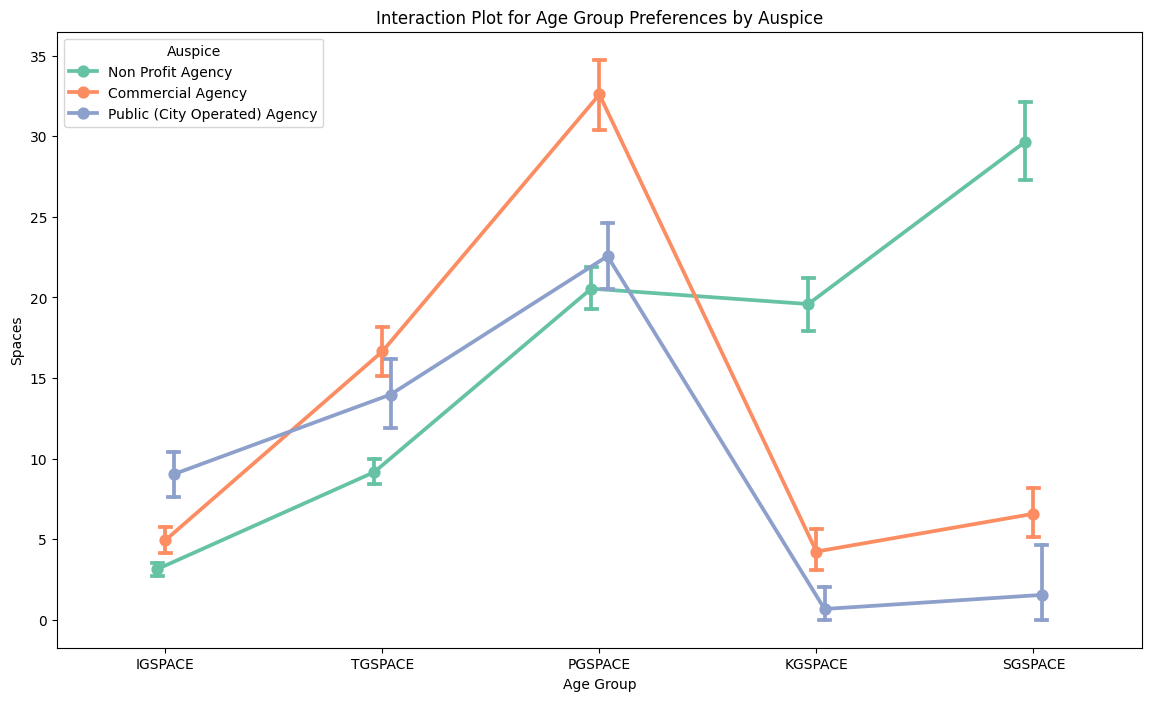

In [21]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='Age_Group', y='Spaces', hue='AUSPICE', data=age_group_long, dodge=True, capsize=.05, palette="Set2")
plt.title('Interaction Plot for Age Group Preferences by Auspice')
plt.xlabel('Age Group')
plt.ylabel('Spaces')
plt.legend(title='Auspice')
plt.show()

The interaction plot shows that the number of spaces varies not only across different auspice types but also across different age groups within those types. For example, Non-Profit Agencies appear to provide a higher number of spaces for preschoolers, while Commercial Agencies offer fewer spaces for infants and kindergarteners. Public Agencies show a consistent number of spaces across all age groups except for a noticeable dip in kindergarten spaces.


In [26]:
# Question 4: Post-hoc test for Age Group Preferences by Auspice
age_group_long['auspice_age_group'] = age_group_long['AUSPICE'] + "_" + age_group_long['Age_Group']
tukey_4 = pairwise_tukeyhsd(endog=age_group_long['Spaces'],
                            groups=age_group_long['auspice_age_group'],
                            alpha=0.05)

tukey_4_results = tukey_4.summary()
tukey_4_results

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency_IGSPACE,Commercial Agency_KGSPACE,-0.704,1.0,-5.5708,4.1627,False
Commercial Agency_IGSPACE,Commercial Agency_PGSPACE,27.6604,0.0,22.7937,32.5272,True
Commercial Agency_IGSPACE,Commercial Agency_SGSPACE,1.6386,0.9984,-3.2281,6.5054,False
Commercial Agency_IGSPACE,Commercial Agency_TGSPACE,11.7165,0.0,6.8498,16.5832,True
Commercial Agency_IGSPACE,Non Profit Agency_IGSPACE,-1.7966,0.9806,-5.9499,2.3567,False
Commercial Agency_IGSPACE,Non Profit Agency_KGSPACE,14.6557,0.0,10.5024,18.8091,True
Commercial Agency_IGSPACE,Non Profit Agency_PGSPACE,15.6117,0.0,11.4583,19.765,True
Commercial Agency_IGSPACE,Non Profit Agency_SGSPACE,24.7326,0.0,20.5792,28.8859,True
Commercial Agency_IGSPACE,Non Profit Agency_TGSPACE,4.2276,0.0412,0.0743,8.3809,True
Commercial Agency_IGSPACE,Public (City Operated) Agency_IGSPACE,4.0911,0.9925,-6.3644,14.5465,False


- Commercial Agencies significantly prioritize preschool-aged children for space allocation over infants and toddlers. This could suggest a focus on age groups that are closer to school age, potentially due to higher demand or profitability.
- Non-Profit Agencies show a broad distribution of spaces across age groups but with a significant preference for school-age children and preschoolers over toddlers. This may reflect a commitment to serve the needs of working families with children who may not yet be in full-time education.
- Public (City Operated) Agencies also show varied space allocations, with a significant difference highlighted between preschool spaces and kindergarten spaces.

These differences indicate that each auspice type may have a unique approach or capacity for serving different age groups, which could be based on factors such as funding, space availability, or educational focus. For stakeholders, understanding these preferences is crucial for planning and could influence decisions about where to allocate resources to fill gaps in child care provision for specific age groups within the community